Assisgment -2

1. Downdown IMDB Dataset
2. Perform Necessary pre-processing
3. Convert into Vector (OHE, Word2Vec, BOW )
4. Create a Model( RNN, LSTM, GRU) - Use kears Library or Pytorch
5. Check the Performance which one is best

In [1]:
# to load, access, process and dump json files - Similar to Python Dictionary
import json
# regular repression(REGEX) to search for specific patterns in text
import re
# to parse HTML contents( web scraping)
from bs4 import BeautifulSoup
# for numerical analysis
import numpy as np 
# to store and process in a dataframe
import pandas as pd 
# for ploting graphs
import matplotlib.pyplot as plt
# advancec ploting
import seaborn as sns
# to create word clouds (A graphical representation where frequently occurring words appear bigger and bolder.)
from wordcloud import WordCloud, STOPWORDS 
# To encode values
from sklearn.preprocessing import LabelEncoder
# Convert a collection of text documents to a matrix of token counts
from sklearn.feature_extraction.text import CountVectorizer
# confusion matrix
from sklearn.metrics import confusion_matrix
# train test split
from sklearn.model_selection import train_test_split
# for deep learning (Build and train neural networks (like CNNs, RNNs, LSTMs, GRUs, Transformers) and Do automatic differentiation (backpropagation)
import tensorflow as tf
# to tokenize text
from tensorflow.keras.preprocessing.text import Tokenizer
# to pad sequence 
from tensorflow.keras.preprocessing.sequence import pad_sequences

Utility Function

In [2]:
def plot_ngram(sentiment, n):
    
    temp_df = df[df['sentiment'] == sentiment]
    ## Here we are making a object which will use ngram to find the words
    ## in the text and then we are passing the ngram object to the CountVectorizer
    word_vectorizer = CountVectorizer(ngram_range=(n, n), analyzer='word')
    ## Here we are using the fit_transform method to convert the text into a matrix of token counts
    ## The fit_transform method will return a sparse matrix of token counts(Sparse matrix is a matrix that contains mostly zeros)
    sparse_matrix = word_vectorizer.fit_transform(temp_df['review'])
    ## Here we are using the sum method to get the sum of the sparse matrix and then we are converting it to an array
    frequencies = sum(sparse_matrix).toarray()[0]
    ## Here we are using the get_feature_names method to get the names of the features and then we are using the DataFrame method to convert it to a dataframe
    ## The DataFrame method will take the frequencies and the feature names and then we are using the sort_values method to sort the dataframe by frequency
    return pd.DataFrame(frequencies, index=word_vectorizer.get_feature_names_out(), columns=['frequency'])\
            .sort_values(by='frequency', ascending=False) \
            .reset_index() \
            .head(10)

In [3]:
def plot_wordcloud(review, cmap):
    fig, ax = plt.subplots(figsize=(8, 6))
    wc = WordCloud(max_words = 1000, background_color ='white', stopwords = stopwords, 
                   min_font_size = 10, colormap=cmap)
    wc = wc.generate(review)
    plt.axis('off')
    plt.imshow(wc)

In [4]:
# to plot model accuracy and loss

def plot_history(history):
    
    plt.figure(figsize=(20, 5))
    plt.subplot(1, 2, 1)
    plt.plot(history.history['accuracy'], label='Training Accuracy', c='green', lw='2')
    plt.plot(history.history['val_accuracy'], label='Validation Accuracy', c='orangered', lw='2')
    plt.title('Accuracy', loc='left', fontsize=16)
    plt.xlabel("Epochs")
    plt.ylabel('Accuracy')
    plt.legend()
    plt.subplot(1, 2, 2)
    plt.plot(history.history['loss'], label='Training Loss', c='green', lw='2')
    plt.plot(history.history['val_loss'], label='Validation Loss', c='orangered', lw='2')
    plt.title('Loss', loc='left', fontsize=16)
    plt.xlabel("Epochs")
    plt.ylabel('Loss')
    plt.legend()
    plt.show()

In [5]:
# to plot confusion matrix
# ========================

def plot_cm(pred, ticklabels, figsize):
    
    pred = pred.ravel()
    pred = np.round(pred)
    fig, ax = plt.subplots(1, 1, figsize=(figsize, figsize))
    cm = confusion_matrix(validation_labels, pred)
    sns.heatmap(cm, annot=True, cbar=False, fmt='1d', cmap='Blues', ax=ax)
    ax.set_xlabel('Predicted')
    ax.set_ylabel('Actual')
    ax.set_xticklabels(ticklabels)
    ax.set_yticklabels(ticklabels, rotation=0)
    plt.show()

In [6]:
# read the data
df = pd.read_csv("kaggle/IMDB Dataset.csv")

# shape
print('No. of rows and columns :', df.shape)

# first few rows
df.head()

No. of rows and columns : (50000, 2)


,review,sentiment
0,One of the other reviewers has mentioned that ...,positive
1,A wonderful little production. <br /><br />The...,positive
2,I thought this was a wonderful way to spend ti...,positive
3,Basically there's a family where a little boy ...,negative
4,"Petter Mattei's ""Love in the Time of Money"" is...",positive


Stopwords

In [7]:
stopwords = [ "a", "about", "above", "after", "again", "against", "all", "am", "an", "and", "any", "are", "as", "at", "be", 
              "because", "been", "before", "being", "below", "between", "both", "but", "by", "could", "did", "do", "does", "doing",
              "down", "during", "each", "few", "for", "from", "further", "had", "has", "have", "having", "he", "he'd", "he'll", "he's",
              "her", "here", "here's", "hers", "herself", "him", "himself", "his", "how", "how's", "i", "i'd", "i'll", "i'm", "i've", "if",
              "in", "into", "is", "it", "it's", "its", "itself", "let's", "me", "more", "most", "my", "myself", "nor", "of", "on", "once",
              "only", "or", "other", "ought", "our", "ours", "ourselves", "out", "over", "own", "same", "she", "she'd", "she'll", "she's",
              "should", "so", "some", "such", "than", "that", "that's", "the", "their", "theirs", "them", "themselves", "then", "there", 
              "there's", "these", "they", "they'd", "they'll", "they're", "they've", "this", "those", "through", "to", "too", "under", "until",
              "up", "very", "was", "we", "we'd", "we'll", "we're", "we've", "were", "what", "what's", "when", "when's", "where", "where's", "which", 
              "while", "who", "who's", "whom", "why", "why's", "with", "would", "you", "you'd", "you'll", "you're", "you've", "your", "yours", "yourself", "yourselves" ]

specific_sw = ['br', 'movie', 'film']

# all stopwords
stopwords = stopwords + specific_sw

No. of reviews in with each sentiment

C:\Users\91819\AppData\Local\Temp\ipykernel_28364\3013461758.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(df['sentiment'], palette=['teal', 'orangered'])


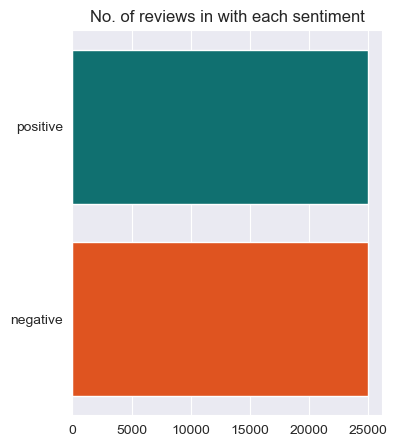

In [8]:
sns.set_style('darkgrid')
plt.figure(figsize=(4, 5))
sns.countplot(df['sentiment'], palette=['teal', 'orangered'])
plt.title('No. of reviews in with each sentiment')
plt.xlabel("")
plt.ylabel("")
plt.show()

Plots

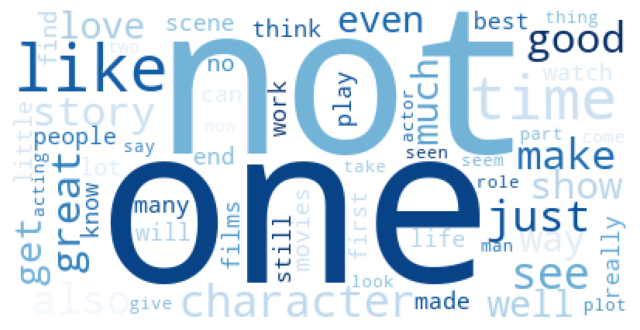

In [9]:
# word cloud on positve reviews
pos_rev = ' '.join(df[df['sentiment']=='positive']['review'].to_list()[:20000])
plot_wordcloud(pos_rev, 'Blues')

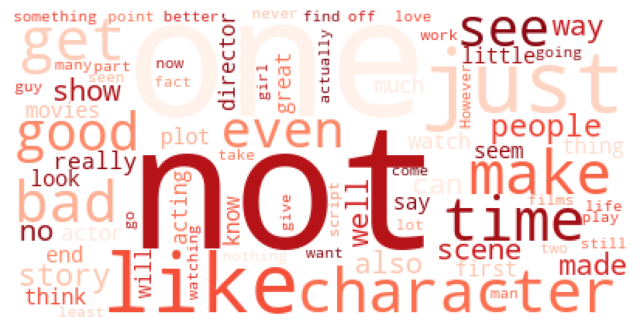

In [10]:
# word cloud on negative reviews
neg_rev = ' '.join(df[df['sentiment']=='negative']['review'].to_list()[:10000])
plot_wordcloud(neg_rev, 'Reds')

In [25]:
## It basically shows the most frequent words(1) in the reviews and their frequency in the reviews with sentiment as positive
plot_ngram('positive', 1)

,index,frequency
0,not,27840
1,one,25730
2,like,17054
3,good,14342
4,just,13899
5,great,12643
6,story,12371
7,see,11864
8,time,11770
9,can,10993


In [12]:
## It basically shows the most frequent words(1) in the reviews and their frequency in the review with sentiment as negative
plot_ngram('negative', 1)

,index,frequency
0,the,326712
1,and,147807
2,of,137305
3,to,136802
4,br,103997
5,is,99252
6,it,95724
7,in,87531
8,this,81354
9,that,74286


In [ ]:
## It basically shows the most frequent consecutive words(2) in the reviews and their frequency in the reviews wth sentiment as positive
plot_ngram('positive', 2)

In [ ]:
## It basically shows the most frequent consecutive words(2) in the reviews and their frequency in the review with sentiment as negative
plot_ngram('negative', 2)

In [ ]:
## It basically shows the most frequent  consecutive words(3) in the reviews and their frequency in the reviews with sentiment as positive
plot_ngram('negative', 3)

In [ ]:
## It basically shows the most frequent consecutive words(3) in the reviews and their frequency in the review with sentiment as negative
plot_ngram('negative', 3)

Preprocessing Data

In [11]:
# to remove non alphanumeric character
def alpha_num(text):
    return re.sub(r'[^A-Za-z0-9 ]', '', text)

# to remove the stopwords from text
def remove_stopwords(text):
    final_text = []
    for i in text.split():
        if i.strip().lower() not in stopwords:
            final_text.append(i.strip())
    return " ".join(final_text)

# to remove URLs
def remove_URL(text):
    url = re.compile(r'https?://\S+|www\.\S+')
    return url.sub(r'',text)

# to remove html tags
def remove_html(text):
    html=re.compile(r'<.*?>')
    return html.sub(r'',text)

In [12]:
# apply preprocessing steps

df['review'] = df['review'].apply(remove_URL)
df['review'] = df['review'].apply(remove_html)
df['review'] = df['review'].str.lower()
df['review'] = df['review'].apply(alpha_num)
df['review'] = df['review'].apply(remove_stopwords)

df.head()

,review,sentiment
0,one reviewers mentioned watching just 1 oz epi...,positive
1,wonderful little production filming technique ...,positive
2,thought wonderful way spend time hot summer we...,positive
3,basically theres family little boy jake thinks...,negative
4,petter matteis love time money visually stunni...,positive


Get review and labels

In [13]:
# container for sentences
reviews = np.array([review for review in df['review']])

# container for labels
labels = np.array([label for label in df['sentiment']])

In [14]:
reviews

array(['one reviewers mentioned watching just 1 oz episode youll hooked right exactly happened methe first thing struck oz brutality unflinching scenes violence set right word go trust not show faint hearted timid show pulls no punches regards drugs sex violence hardcore classic use wordit called oz nickname given oswald maximum security state penitentary focuses mainly emerald city experimental section prison cells glass fronts face inwards privacy not high agenda em city home manyaryans muslims gangstas latinos christians italians irish moreso scuffles death stares dodgy dealings shady agreements never far awayi say main appeal show due fact goes shows wouldnt dare forget pretty pictures painted mainstream audiences forget charm forget romanceoz doesnt mess around first episode ever saw struck nasty surreal couldnt say ready watched developed taste oz got accustomed high levels graphic violence not just violence injustice crooked guards wholl sold nickel inmates wholl kill order get 

In [15]:
labels

array(['positive', 'positive', 'positive', ..., 'negative', 'negative',
       'negative'], dtype='<U8')

Label encode sentiment

In [16]:
# label encoding labels 
#This object will help you convert categorical labels (strings) into numeric labels.
enc = LabelEncoder()
#This will convert the labels into numeric values. For example, if you have two classes 'positive' and 'negative', it will convert them to 0 and 1 respectively.
encoded_labels = enc.fit_transform(labels)
#This prints the unique classes found by the encoder in alphabetical order:
print(enc.classes_)
#This prints the first 5 original labels 
print(labels[:5])
#This will print their corresponding encoded values
print(encoded_labels[:5])

['negative' 'positive']
['positive' 'positive' 'positive' 'negative' 'positive']
[1 1 1 0 1]


Train Test Split

In [17]:
# train-test split
# strify = True means that the split will on the same proportion as the original data(lets say i we have 6 labels present in total and 3 are -ve and 3 are +ve)
# so the split will be 50% -ve and 50% +ve on both test and trainging data set
train_sentences, validation_sentences, train_labels, validation_labels = train_test_split(reviews, encoded_labels, 
                                                                                          test_size=0.33, 
                                                                                          stratify=labels)

In [18]:
#This  will give me total number of words in the data set
tokenizer = Tokenizer()
tokenizer.fit_on_texts(reviews)
word_index = tokenizer.word_index
print("Total unique words:", len(word_index))

Total unique words: 221596


In [20]:
# model parameters

vocab_size = 30000
embedding_dim = 100
max_length = 120
trunc_type='post'
padding_type='post'
oov_tok = "<OOV>"

Tokenize and Sequence text

In [21]:
# tokenize sentences for 20000 most frequent words
# oov_token = out of vocabulary token, it will replace any word not in the top 20000 most frequent words with <OOV>
# num_words = 20000 means that we are only considering the top 20000 most frequent words in the data set    
tokenizer = Tokenizer(num_words = vocab_size, oov_token=oov_tok)
tokenizer.fit_on_texts(train_sentences)
word_index = tokenizer.word_index

# convert train dataset to sequence and pad sequences
# This will convert the sentences into sequences of integers, where each integer represents a word in the vocabulary.
# The pad_sequences function will then pad the sequences to the same length (100 in this case) by adding zeros at the end of the sequences.
train_sequences = tokenizer.texts_to_sequences(train_sentences)
train_padded = pad_sequences(train_sequences, padding=padding_type, maxlen=max_length)

# convert validation dataset to sequence and pad sequences
# This will convert the sentences into sequences of integers, where each integer represents a word in the vocabulary.
# The pad_sequences function will then pad the sequences to the same length (100 in this case) by adding zeros at the end of the sequences.
validation_sequences = tokenizer.texts_to_sequences(validation_sentences)
validation_padded = pad_sequences(validation_sequences, padding=padding_type, maxlen=max_length)

In [22]:
# model initialization
model = tf.keras.Sequential([
    tf.keras.layers.Embedding(vocab_size, embedding_dim, input_length=20),
    tf.keras.layers.GlobalAveragePooling1D(),
    tf.keras.layers.Dense(24, activation='relu'),
    tf.keras.layers.Dense(1, activation='sigmoid')
])

# compile model
model.compile(loss='binary_crossentropy',
              optimizer='adam',
              metrics=['accuracy'])

# model summary
model.summary()

c:\Users\91819\anacondaMain\Lib\site-packages\keras\src\layers\core\embedding.py:90: UserWarning: Argument `input_length` is deprecated. Just remove it.
  warnings.warn(


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ embedding (Embedding)           │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ global_average_pooling1d        │ ?                      │             0 │
│ (GlobalAveragePooling1D)        │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ ?                      │   0 (unbuilt) │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 0 (0.00 B)

 Trainable params: 0 (0.00 B)

 Non-trainable params: 0 (0.00 B)

In [23]:
# fit model
num_epochs = 10
history = model.fit(train_padded, train_labels, 
                    epochs=num_epochs, verbose=2, 
                    validation_split=0.3)

# predict values
pred = model.predict(validation_padded)

Epoch 1/10
733/733 - 39s - 53ms/step - accuracy: 0.8151 - loss: 0.4228 - val_accuracy: 0.8800 - val_loss: 0.2885
Epoch 2/10
733/733 - 33s - 45ms/step - accuracy: 0.9172 - loss: 0.2142 - val_accuracy: 0.8854 - val_loss: 0.2826
Epoch 3/10
733/733 - 35s - 48ms/step - accuracy: 0.9481 - loss: 0.1466 - val_accuracy: 0.8795 - val_loss: 0.3141
Epoch 4/10
733/733 - 33s - 45ms/step - accuracy: 0.9661 - loss: 0.0999 - val_accuracy: 0.8746 - val_loss: 0.3619
Epoch 5/10
733/733 - 33s - 45ms/step - accuracy: 0.9781 - loss: 0.0705 - val_accuracy: 0.8613 - val_loss: 0.4357
Epoch 6/10
733/733 - 33s - 45ms/step - accuracy: 0.9803 - loss: 0.0593 - val_accuracy: 0.8628 - val_loss: 0.4589
Epoch 7/10
733/733 - 34s - 46ms/step - accuracy: 0.9872 - loss: 0.0394 - val_accuracy: 0.8637 - val_loss: 0.5062
Epoch 8/10
733/733 - 34s - 46ms/step - accuracy: 0.9907 - loss: 0.0308 - val_accuracy: 0.8593 - val_loss: 0.5740
Epoch 9/10
733/733 - 33s - 46ms/step - accuracy: 0.9894 - loss: 0.0309 - val_accuracy: 0.8365 - 

In [24]:
pred

array([[2.1113370e-05],
       [9.9999630e-01],
       [3.1399404e-04],
       ...,
       [9.9999964e-01],
       [9.9999982e-01],
       [1.1058902e-05]], dtype=float32)

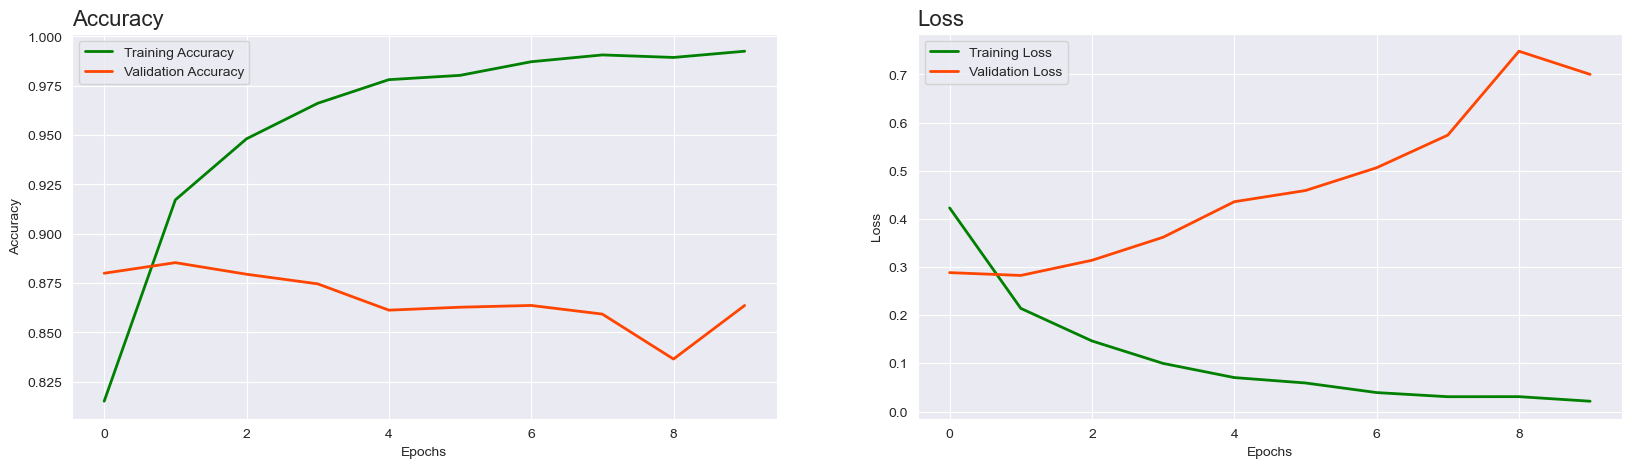

In [25]:
plot_history(history)

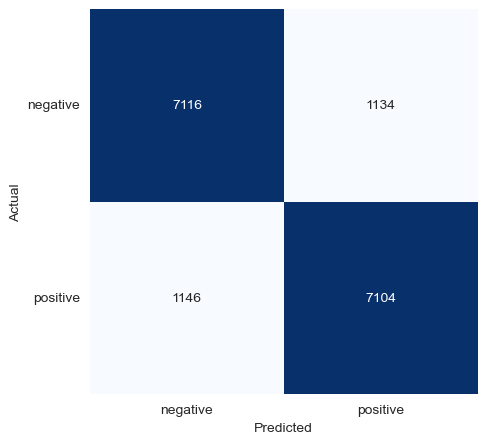

In [26]:
# plot confusion matrix
plot_cm(pred, enc.classes_, 5)

In [28]:
# reviews on which we need to predict
sentence = ["The movie was very kind of awesome", 
            "This was worst king of movie"]

# convert to a sequence
sequences = tokenizer.texts_to_sequences(sentence)

# pad the sequence
padded = pad_sequences(sequences, maxlen=max_length, padding=padding_type, truncating=trunc_type)

# preict the label
print(model.predict(padded))

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 69ms/step
[[0.8965589 ]
 [0.07095135]]


With LSTM

In [29]:
# model initialization
model = tf.keras.Sequential([
    tf.keras.layers.Embedding(vocab_size, embedding_dim, input_length=max_length),
    tf.keras.layers.Bidirectional(tf.keras.layers.LSTM(64)),
    tf.keras.layers.Dense(24, activation='relu'),
    tf.keras.layers.Dense(1, activation='sigmoid')
])

# compile model
model.compile(loss='binary_crossentropy',
              optimizer='adam',
              metrics=['accuracy'])

# model summary
model.summary()

c:\Users\91819\anacondaMain\Lib\site-packages\keras\src\layers\core\embedding.py:90: UserWarning: Argument `input_length` is deprecated. Just remove it.
  warnings.warn(


Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ embedding_1 (Embedding)         │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ bidirectional (Bidirectional)   │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3 (Dense)                 │ ?                      │   0 (unbuilt) │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 0 (0.00 B)

 Trainable params: 0 (0.00 B)

 Non-trainable params: 0 (0.00 B)

In [30]:
# fit model
num_epochs = 10
history = model.fit(train_padded, train_labels, 
                    epochs=num_epochs, verbose=2, 
                    validation_split=0.33)

# predict values
pred = model.predict(validation_padded)

Epoch 1/10
702/702 - 78s - 112ms/step - accuracy: 0.8196 - loss: 0.4032 - val_accuracy: 0.8733 - val_loss: 0.3144
Epoch 2/10
702/702 - 80s - 115ms/step - accuracy: 0.9327 - loss: 0.1821 - val_accuracy: 0.8756 - val_loss: 0.3225
Epoch 3/10
702/702 - 69s - 99ms/step - accuracy: 0.9710 - loss: 0.0887 - val_accuracy: 0.8565 - val_loss: 0.5095
Epoch 4/10
702/702 - 72s - 103ms/step - accuracy: 0.9772 - loss: 0.0653 - val_accuracy: 0.8535 - val_loss: 0.6268
Epoch 5/10
702/702 - 72s - 103ms/step - accuracy: 0.9891 - loss: 0.0338 - val_accuracy: 0.8583 - val_loss: 0.7147
Epoch 6/10
702/702 - 70s - 100ms/step - accuracy: 0.9944 - loss: 0.0169 - val_accuracy: 0.8428 - val_loss: 0.6477
Epoch 7/10
702/702 - 71s - 101ms/step - accuracy: 0.9939 - loss: 0.0176 - val_accuracy: 0.8385 - val_loss: 0.6472
Epoch 8/10
702/702 - 69s - 98ms/step - accuracy: 0.9959 - loss: 0.0134 - val_accuracy: 0.8544 - val_loss: 0.8135
Epoch 9/10
702/702 - 77s - 109ms/step - accuracy: 0.9980 - loss: 0.0069 - val_accuracy: 0.

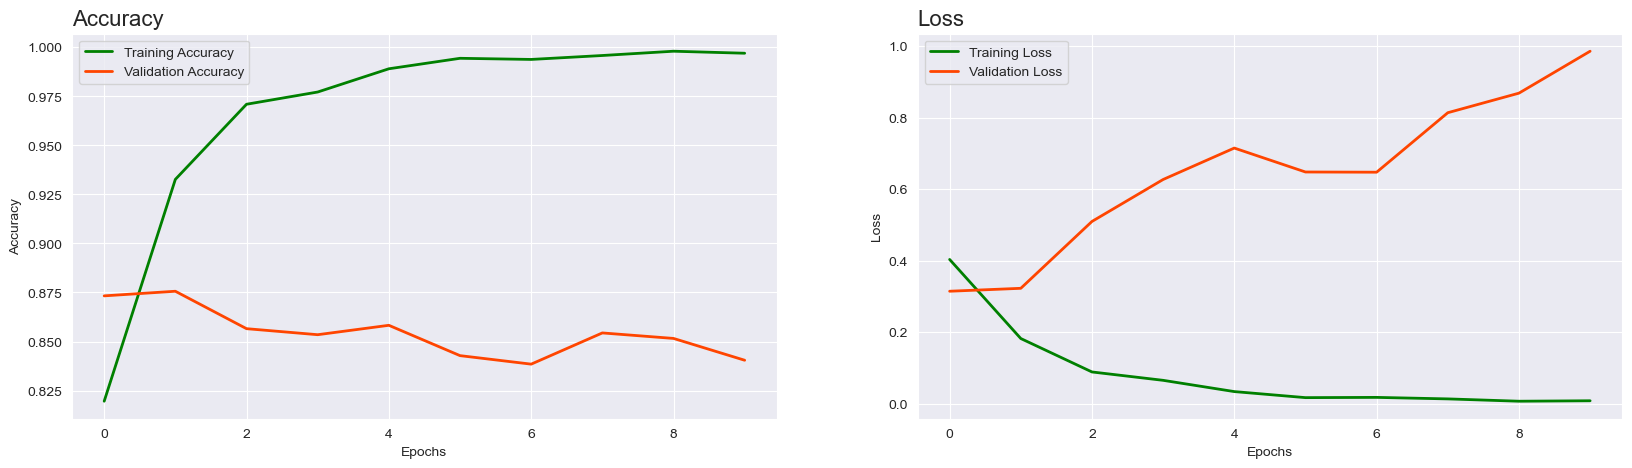

In [31]:
# plot history
plot_history(history)   

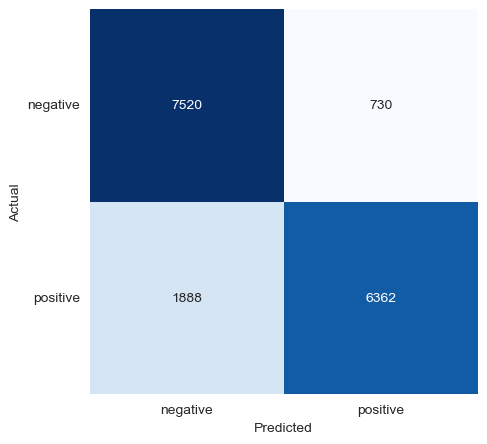

In [32]:
# plot confusion matrix
plot_cm(pred, enc.classes_, 5)

In [33]:
# reviews on which we need to predict
sentence = ["The movie was very touching and heart whelming", 
            "I have never seen a terrible movie like this"]

# convert to a sequence
sequences = tokenizer.texts_to_sequences(sentence)

# pad the sequence
padded = pad_sequences(sequences, maxlen=max_length, padding=padding_type, truncating=trunc_type)

# preict the label
print(model.predict(padded))

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 60ms/step
[[0.00755092]
 [0.00367463]]


LSTM - 2 Layers

In [34]:
# model initialization
model = tf.keras.Sequential([
    tf.keras.layers.Embedding(vocab_size, embedding_dim, input_length=max_length),
    tf.keras.layers.Bidirectional(tf.keras.layers.LSTM(64, return_sequences=True)),
    tf.keras.layers.Bidirectional(tf.keras.layers.LSTM(32)),
    tf.keras.layers.Dense(24, activation='relu'),
    tf.keras.layers.Dense(1, activation='sigmoid')
])

# compile model
model.compile(loss='binary_crossentropy',
              optimizer='adam',
              metrics=['accuracy'])

# model summary
model.summary()

c:\Users\91819\anacondaMain\Lib\site-packages\keras\src\layers\core\embedding.py:90: UserWarning: Argument `input_length` is deprecated. Just remove it.
  warnings.warn(


Model: "sequential_2"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ embedding_2 (Embedding)         │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ bidirectional_1 (Bidirectional) │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ bidirectional_2 (Bidirectional) │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_4 (Dense)                 │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_5 (Dense)                 │ ?                      │   0 (unbuilt) │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 0 (0.00 B)

 Trainable params: 0 (0.00 B)

 Non-trainable params: 0 (0.00 B)

In [35]:
# fit model
num_epochs = 2
history = model.fit(train_padded, train_labels, 
                    epochs=num_epochs, verbose=2, 
                    validation_split=0.33)

# predict values
pred = model.predict(validation_padded)

Epoch 1/2
702/702 - 132s - 189ms/step - accuracy: 0.8216 - loss: 0.3879 - val_accuracy: 0.8742 - val_loss: 0.2984
Epoch 2/2
702/702 - 109s - 155ms/step - accuracy: 0.9412 - loss: 0.1633 - val_accuracy: 0.8683 - val_loss: 0.3621
516/516 ━━━━━━━━━━━━━━━━━━━━ 20s 37ms/step


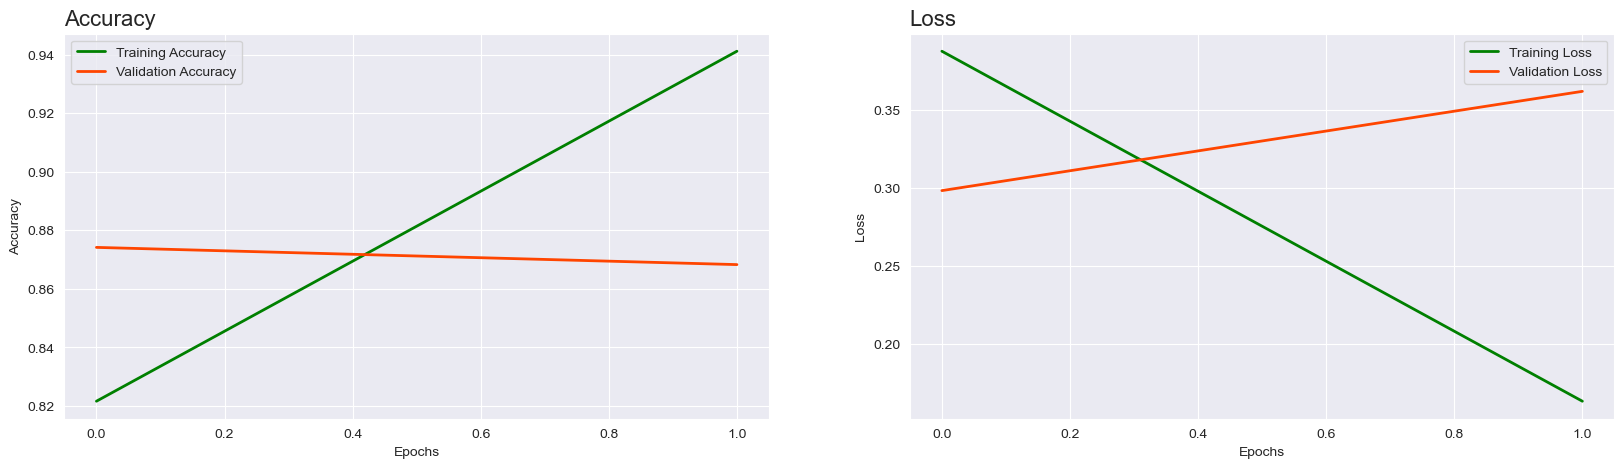

In [36]:
# plot history
plot_history(history)

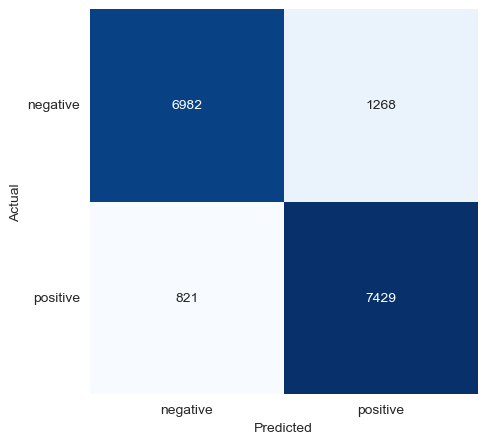

In [37]:
# plot confusion matrix
plot_cm(pred, enc.classes_, 5)

In [38]:
# reviews on which we need to predict
sentence = ["The movie was very touching and heart whelming", 
            "I have never seen a terrible movie like this"]

# convert to a sequence
sequences = tokenizer.texts_to_sequences(sentence)

# pad the sequence
padded = pad_sequences(sequences, maxlen=max_length, padding=padding_type, truncating=trunc_type)

# preict the label
print(model.predict(padded))

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 57ms/step
[[0.7403114 ]
 [0.12113287]]


With GRU

In [39]:
# model initialization
model = tf.keras.Sequential([
    tf.keras.layers.Embedding(vocab_size, embedding_dim, input_length=max_length),
    tf.keras.layers.Bidirectional(tf.keras.layers.GRU(64)),
    tf.keras.layers.Dense(24, activation='relu'),
    tf.keras.layers.Dense(1, activation='sigmoid')
])

# compile model
model.compile(loss='binary_crossentropy',
              optimizer='adam',
              metrics=['accuracy'])

# model summary
model.summary()

c:\Users\91819\anacondaMain\Lib\site-packages\keras\src\layers\core\embedding.py:90: UserWarning: Argument `input_length` is deprecated. Just remove it.
  warnings.warn(


Model: "sequential_3"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ embedding_3 (Embedding)         │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ bidirectional_3 (Bidirectional) │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_6 (Dense)                 │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_7 (Dense)                 │ ?                      │   0 (unbuilt) │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 0 (0.00 B)

 Trainable params: 0 (0.00 B)

 Non-trainable params: 0 (0.00 B)

In [40]:
# fit model
num_epochs = 1
history = model.fit(train_padded, train_labels, 
                    epochs=num_epochs, verbose=2, 
                    validation_split=0.33)

# predict values
pred = model.predict(validation_padded)

702/702 - 83s - 118ms/step - accuracy: 0.7943 - loss: 0.4275 - val_accuracy: 0.8570 - val_loss: 0.3449
516/516 ━━━━━━━━━━━━━━━━━━━━ 12s 21ms/step


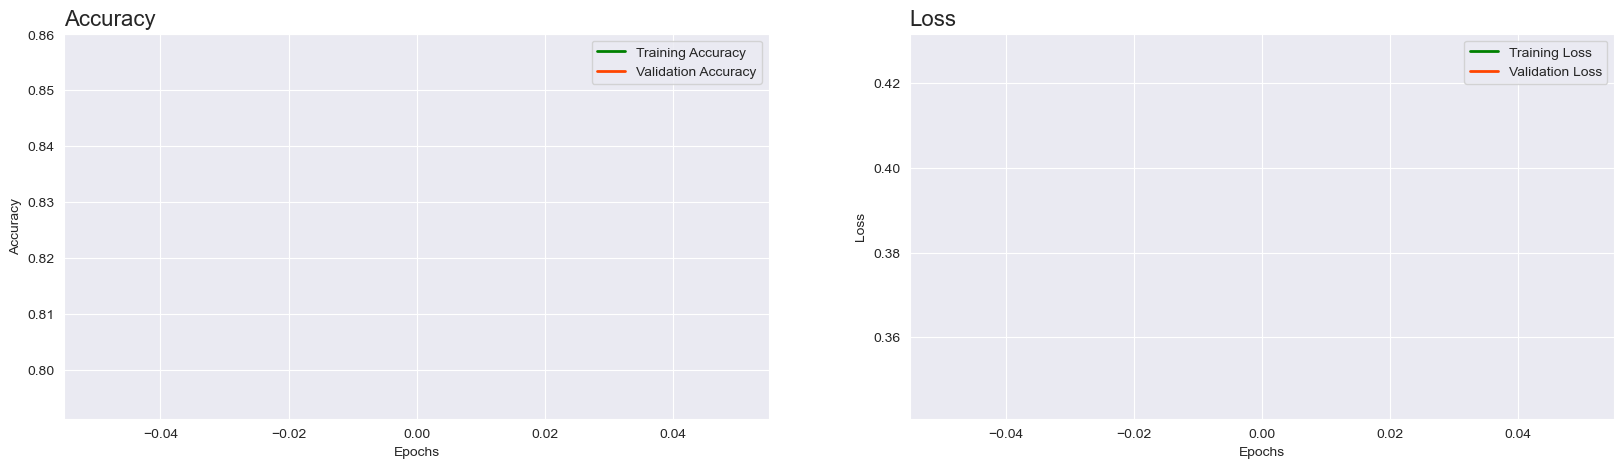

In [41]:
# plot history
plot_history(history)

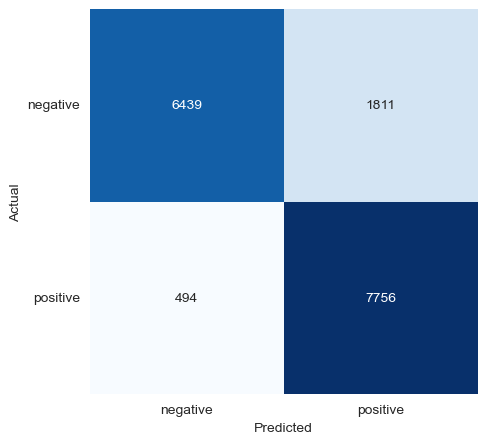

In [42]:
# plot confusion matrix
plot_cm(pred, enc.classes_, 5)

In [43]:
# reviews on which we need to predict
sentence = ["The movie was very touching and heart whelming", 
            "I have never seen a terrible movie like this"]

# convert to a sequence
sequences = tokenizer.texts_to_sequences(sentence)

# pad the sequence
padded = pad_sequences(sequences, maxlen=max_length, padding=padding_type, truncating=trunc_type)

# preict the label
print(model.predict(padded))

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 49ms/step
[[0.68585885]
 [0.25208914]]
